In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from dpca import DensityPeakCluster

In [ ]:
file = "aggregation"

In [ ]:
#Doc file data
data = pd.read_csv(r"data/data/%s.txt" % file, sep="\t", header=None)
data_arr = np.array(data)

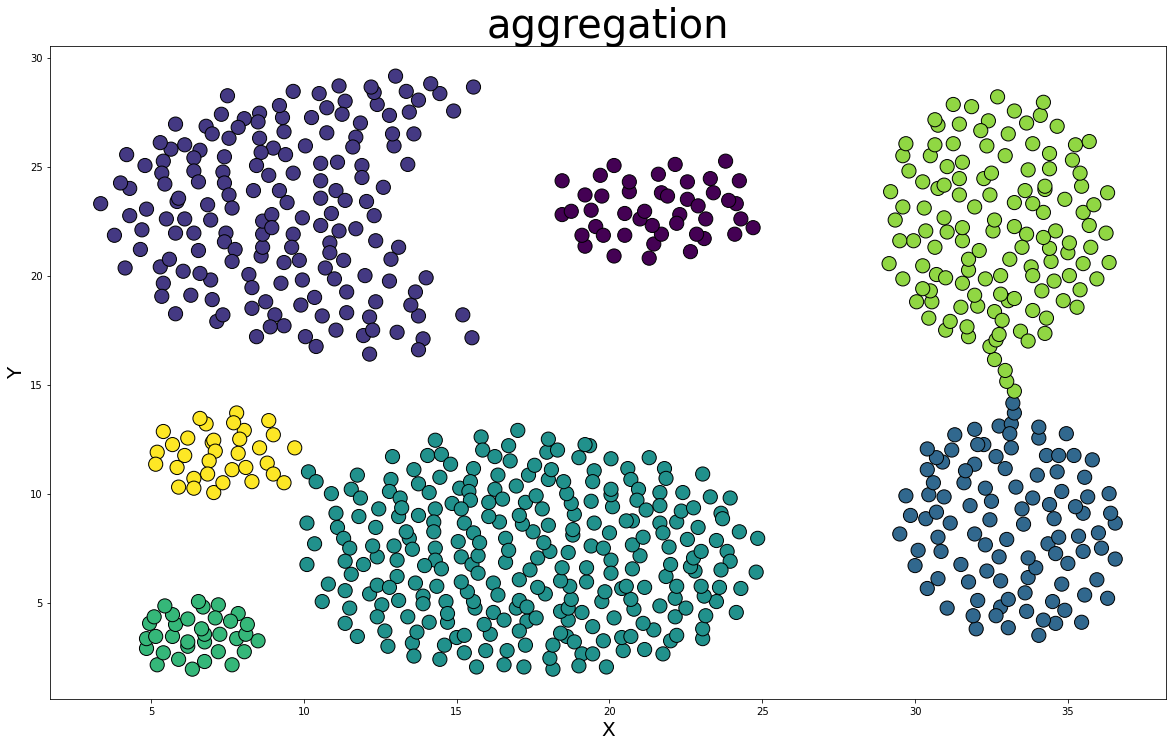

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=data.iloc[:,2], marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(file, fontsize=40)
plt.show()

Kmeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)
y_pred = kmeans.fit_predict(data.iloc[:,[0,1]])


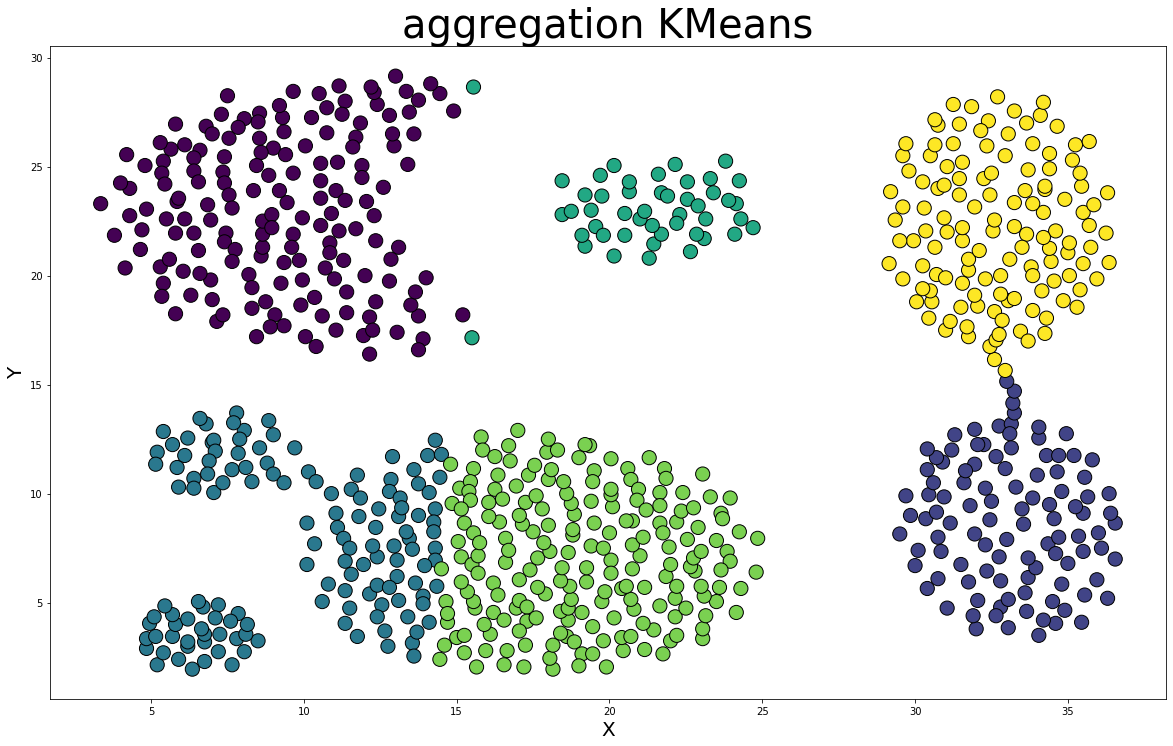

In [ ]:
# Show kết quả phân cụm
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(file + " KMeans", fontsize=40)
plt.show()

0.5173423946500639


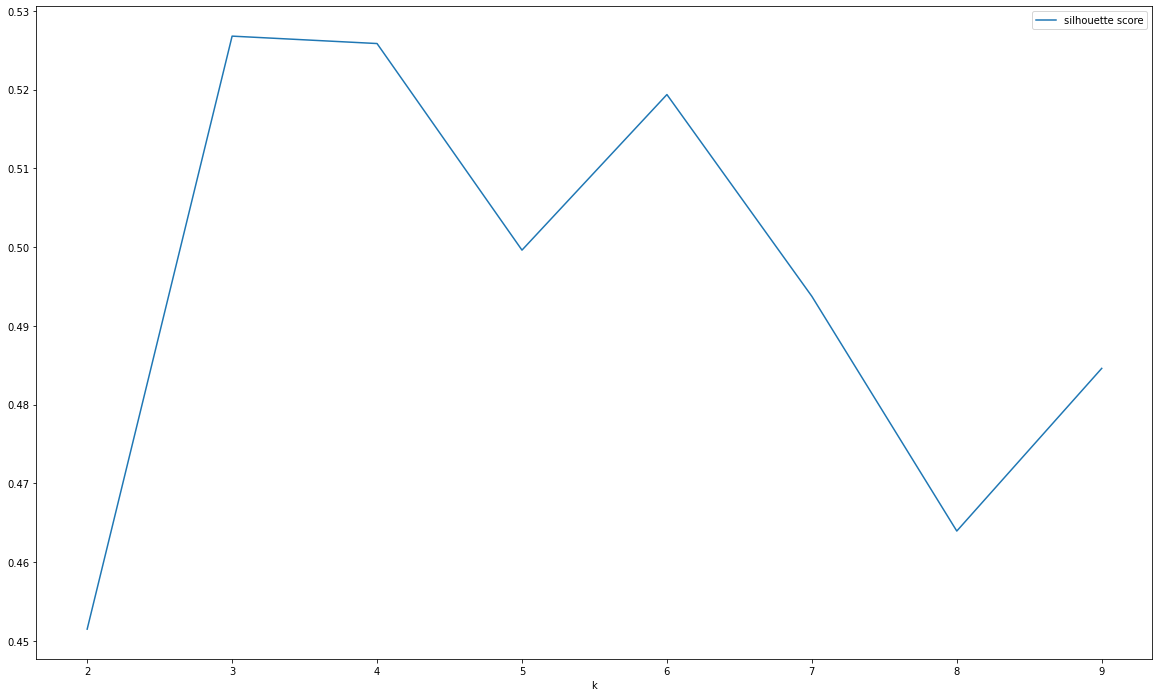

In [ ]:
print(metrics.silhouette_score(data,y_pred))
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  y_pred = kmeans.fit_predict(data)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(data, y_pred))
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))
plt.show()

DBSCAN

In [ ]:
import ipywidgets as widgets
display(widgets.HTML(f'<img src="examples/9D6aAF2.gif">'))

HTML(value='<img src="examples/9D6aAF2.gif">')

In [ ]:
db = DBSCAN(eps=2.5, min_samples=15).fit(data)
y_pred_DB = db.fit_predict(data)


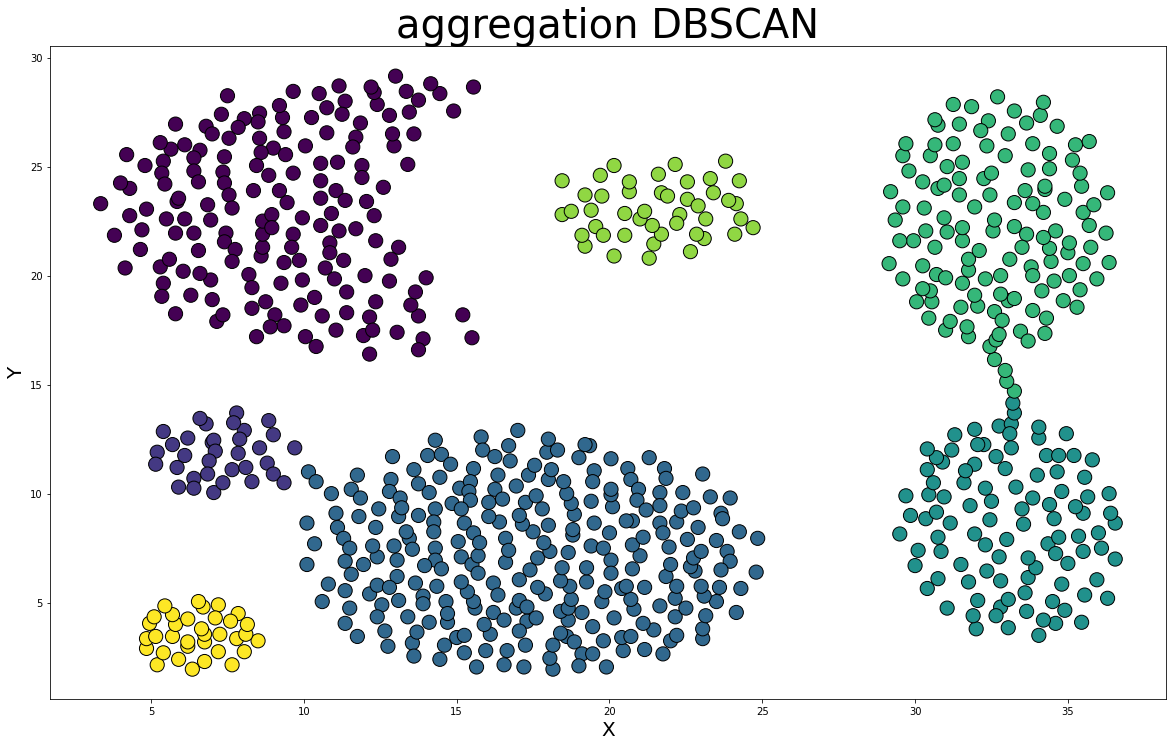

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.title(file + " DBSCAN", fontsize=40)
plt.show()

Density peak clustering (DPC)

In [ ]:
dpca = DensityPeakCluster(density_threshold=8, distance_threshold=5, anormal=False)
dpca.fit(data.iloc[:,[0,1]])

In [ ]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()


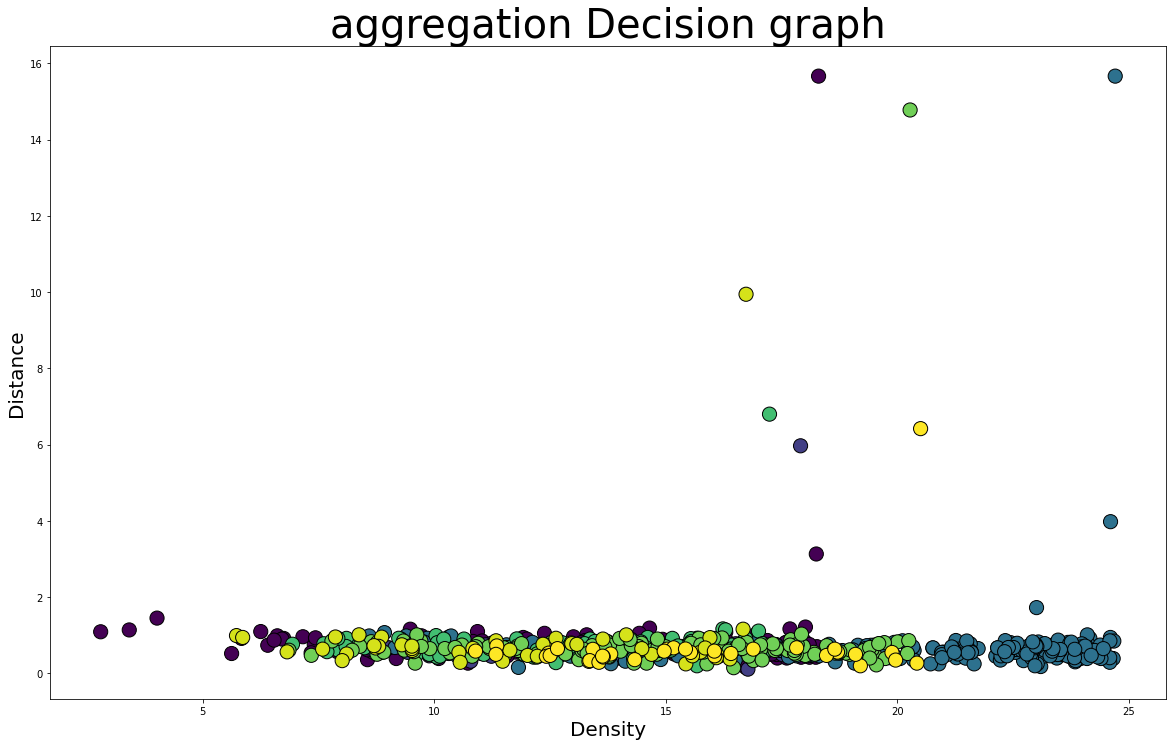

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title(file + " Decision graph", fontsize=40)
plt.show()

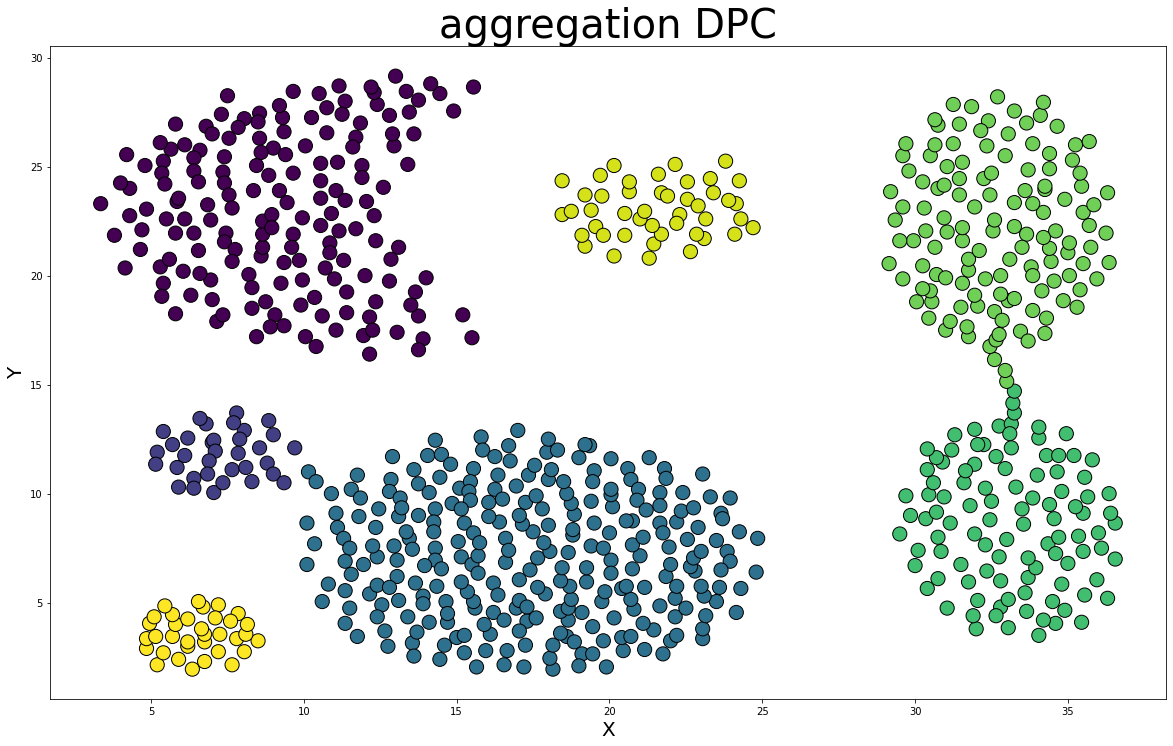

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:,0],data_arr[:,1],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(file + " DPC", fontsize=40)
plt.show()